<a href="https://colab.research.google.com/github/450586509/reinforcement-learning-practice/blob/master/approximate_qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

利用tensorflow 实现qlearning


In [0]:
import os
os.system('apt-get install -y xvfb')
os.system('wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall18/xvfb -O ../xvfb')
os.system('apt-get install -y python-opengl ffmpeg')
os.system('pip install pyglet==1.2.4')

if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

In [0]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

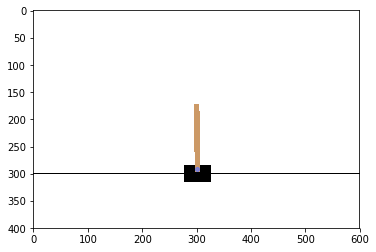

In [36]:
env = gym.make("CartPole-v0").env
env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape[0]

plt.imshow(env.render("rgb_array"))


够着一个简单的网络表示q-table
- 网络的输入为状态s，输出为q(s,a),输出神经元的数量等于action的数量

todo:
- 基于keras实现，两层的全连接网络，hidden_size，分别是[100,100,action_num]
- 不用激励函数。
- 实现get_action(state, network, epsilon=0)
- network如何训练？训练数据？

In [37]:
state_dim

4

In [0]:
import keras
from keras import layers
network = keras.models.Sequential()


network.add(layers.Dense(units=128, activation='relu', input_dim=state_dim))
network.add(layers.Dense(units=128, activation='relu'))
network.add(layers.Dense(units=n_actions))
network.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])


In [0]:
import numpy as np
from numpy import random
def get_action(state, epsilon=0):
    """
    sample actions with epsilon-greedy policy
    recap: with p = epsilon pick random action, else pick action with highest Q(s,a)
    """
    s = np.array([state])
    q_values = network.predict(s)[0]
    #print("q_values={0}".format(q_values))
    
    ###YOUR CODE
    best_action = np.argmax(q_values)
    random_actions = random.choice(list(range(len(q_values))),1)
    random_action=random_actions[0]
    flag = random.choice([True, False],1,p=[epsilon, 1-epsilon])
    if flag[0]:
      return random_action
    return best_action

In [0]:
assert network.output_shape == (None, n_actions), "please make sure your model maps state s -> [Q(s,a0), ..., Q(s, a_last)]"
assert network.layers[-1].activation == keras.activations.linear, "please make sure you predict q-values without nonlinearity"
s = env.reset()
assert np.shape(get_action(s)) == (), "please return just one action (integer)"

In [61]:
for eps in [0., 0.1, 0.5, 1.0]:
    state_frequencies = np.bincount([get_action(s, epsilon=eps) for i in range(10000)], minlength=n_actions)
    best_action = state_frequencies.argmax()
    assert abs(state_frequencies[best_action] - 10000 * (1 - eps + eps / n_actions)) < 200
    for other_action in range(n_actions):
        if other_action != best_action:
            assert abs(state_frequencies[other_action] - 10000 * (eps / n_actions)) < 200
    print('e=%.1f tests passed'%eps)

e=0.0 tests passed
e=0.1 tests passed
e=0.5 tests passed
e=1.0 tests passed


(4,)
[[-0.00733531  0.00976463]]
1
